# (23) Simulation -- generate

**Motivation**: Explore the behavior of the simulated optical flow. Find true independent parameters, generate lots of samples. <br>

In [1]:
# HIDE CODE


import os, sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from model.opticflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def show_thetaphi(t, p):
    fig, axes = create_figure(1, 4, (13, 2.5), tight_layout=True)
    im = axes[0].imshow(t, cmap='nipy_spectral')
    plt.colorbar(im, ax=axes[0])

    im = axes[2].imshow(p, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.colorbar(im, ax=axes[2])

    for ax in [axes[0], axes[2]]:
        ax.invert_yaxis()
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=of.ticks,
            yticks=of.ticks,
            xticklabels=of.ticklabels,
            yticklabels=of.ticklabels,
        )

    axes[1].axvline(np.deg2rad(fov), color='r', ls='--', label=f'{fov} deg')
    sns.histplot(
        t.ravel(), ax=axes[1], label=r'$\theta$',
        bins=np.linspace(0, np.pi/2, 91), stat='count')
    sns.histplot(
        p.ravel(), ax=axes[3], label=r'$\phi$', color='C0',
        bins=np.linspace(0, 2*np.pi, 37), stat='count')
    
    sns.histplot(
        p[t <= np.deg2rad(fov)], ax=axes[3], label=r'$\phi$' + f' (<{fov})', color='C1',
        bins=np.linspace(0, 2*np.pi, 37), stat='count')
    for ax in [axes[1], axes[3]]:
        ax.set_ylabel('')
        ax.legend(fontsize=8, loc='upper left')

    plt.show()
    
    
def show_xyzd(x, y, z, d, cmap='Spectral', grid=False):
    fig, axes = create_figure(1, 4, (12, 2.5), 'all', 'all', tight_layout=True)
    im = axes[0].imshow(x, cmap=cmap)
    plt.colorbar(im, ax=axes[0])
    axes[0].set_title(r'$\mathcal{x}$', y=1.02, fontsize=17)

    im = axes[1].imshow(y, cmap=cmap)
    plt.colorbar(im, ax=axes[1])
    axes[1].set_title(r'$\mathcal{y}$', y=1.02, fontsize=17)

    im = axes[2].imshow(z, cmap=cmap)
    plt.colorbar(im, ax=axes[2])
    axes[2].set_title(r'$\mathcal{z}$', y=1.02, fontsize=17)

    im = axes[3].imshow(d, cmap=cmap)
    plt.colorbar(im, ax=axes[3])
    axes[3].set_title(r'$\mathcal{d} = \sqrt{\mathcal{x}^2+\mathcal{y}^2+\mathcal{z}^2}$', y=1.02, fontsize=14)

    axes[-1].invert_yaxis()
    for ax in axes.flat:
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=of.ticks,
            yticks=of.ticks,
            xticklabels=of.ticklabels,
            yticklabels=of.ticklabels,
        )
    if grid:
        add_grid(axes)
    plt.show()
    
    
def hist_xyzd(x, y, d, z=None, bins=30):
    kws = {
        'bins': bins,
        'stat': 'percent',
    }
    fig, axes = create_figure(2, 4, (13, 5), sharey='all', constrained_layout=True)
    sns.histplot(x.ravel(), ax=axes[0, 0], **kws)
    sns.histplot(y.ravel(), ax=axes[0, 1], **kws)
    if z is not None:
        sns.histplot(z.ravel(), ax=axes[0, 2], **kws)
    sns.histplot(d.ravel(), ax=axes[0, 3], **kws)

    sns.histplot(x[of.theta < np.deg2rad(fov)], ax=axes[1, 0], **kws)
    sns.histplot(y[of.theta < np.deg2rad(fov)], ax=axes[1, 1], **kws)
    if z is not None:
        sns.histplot(z[of.theta < np.deg2rad(fov)], ax=axes[1, 2], **kws)
    sns.histplot(d[of.theta < np.deg2rad(fov)], ax=axes[1, 3], **kws)
    
    axes[0, 0].set_title(r'$x$', y=1.02, fontsize=17)
    axes[0, 1].set_title(r'$y$', y=1.02, fontsize=17)
    axes[0, 2].set_title(r'$z$', y=1.02, fontsize=17)
    axes[0, 3].set_title(r'$d$', y=1.02, fontsize=17)
    
    plt.show()
    

def show_velocity(v, cmap='Spectral_r', grid=False):
    rho, phi = vel2polar(v)
    vminmax = np.max(np.abs(v))
    kws = dict(
        cmap='bwr',
        vmax=vminmax,
        vmin=-vminmax,
    )
    fig, axes = create_figure(1, 4, (12, 2.5), 'all', 'all', tight_layout=True)
    im = axes[0].imshow(v[..., 0], **kws)
    plt.colorbar(im, ax=axes[0])
    axes[0].set_title(r'$v_x$', y=1.02, fontsize=17)

    im = axes[1].imshow(v[..., 1], **kws)
    plt.colorbar(im, ax=axes[1])
    axes[1].set_title(r'$v_y$', y=1.02, fontsize=17)

    im = axes[2].imshow(rho, cmap=cmap)
    plt.colorbar(im, ax=axes[2])
    axes[2].set_title(r'$\rho$', y=1.02, fontsize=17)

    im = axes[3].imshow(phi, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.colorbar(im, ax=axes[3])
    axes[3].set_title(r'$\phi$', y=1.02, fontsize=14)

    axes[-1].invert_yaxis()
    for ax in axes.flat:
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=of.ticks,
            yticks=of.ticks,
            xticklabels=of.ticklabels,
            yticklabels=of.ticklabels,
        )
    if grid:
        add_grid(axes)
    plt.show()


from skimage.transform import resize

def show_opticflow(v, dims=None):
    dims = dims if dims else [2, 4, 8]
    fig, axes = create_figure(1, 3, (12, 4), constrained_layout=True)
    for i, d in enumerate(dims):
        axes[i].quiver(
            range(-d, d + 1),
            range(-d, d + 1),
            resize(v[..., 0], (2*d+1,) * 2),
            resize(v[..., 1], (2*d+1,) * 2),
        )
    ax_square(axes)
    plt.show()
    return

## Setup

In [3]:
fov = 45
res = 1

fix = np.array([
    [0, 0],
    [0.4, 0],
    [0, 0.4],
    [0.4, 0.4],
])
of = OpticFlow(fov, res).compute_coords(fix)

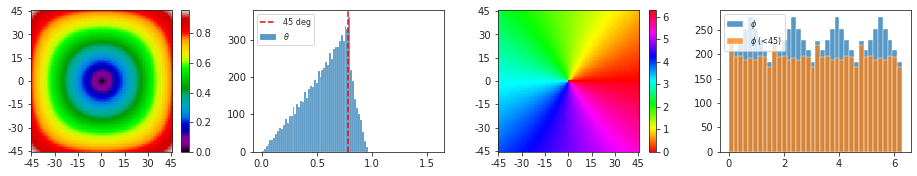

In [4]:
theta, phi = self2polar(of.alpha[..., 0], of.alpha[..., 1])
show_thetaphi(theta, phi)

## Sampler

In [5]:
fov = 45
dim = 19
res = 2 * fov / (dim - 1)

self = sim = SimulationMult(
    fov=fov,
    n_fix=60,
    n_slf=60,
    n_obj=60,
    verbose=True,
).uniform()

29.7 % of total simulations accepted (using fov_ratio = 0.8)

In [6]:
self.acc.sum(), len(self.acc)

(64200, 216000)

In [7]:
%%time

of = OpticFlow(fov, res).compute_coords(self.fix[0])
alpha_dot = of.compute_flow(self.vel_slf, self.pos_obj, self.vel_obj)
alpha_dot.shape

CPU times: user 171 ms, sys: 109 ms, total: 279 ms
Wall time: 277 ms


(1, 19, 19, 2, 60, 60)

In [8]:
def get_alpha_dot(f):
    of = OpticFlow(fov, res).compute_coords(f)
    return of.compute_flow(self.vel_slf, self.pos_obj, self.vel_obj)

In [9]:
%%time

with joblib.parallel_backend('multiprocessing'):
    alpha_dot = joblib.Parallel(n_jobs=-1)(
        joblib.delayed(get_alpha_dot)
        (f) for f in self.fix
    )

CPU times: user 4.71 s, sys: 3.53 s, total: 8.24 s
Wall time: 8.83 s


In [10]:
alpha_dot = np.concatenate(alpha_dot)
alpha_dot.shape

(60, 19, 19, 2, 60, 60)

In [11]:
stim = flatten_arr(np.transpose(
    alpha_dot, (0, -2, -1, 1, 2, 3)), ndim_end=3)
stim = stim[sim.acc]
stim.shape

(64200, 19, 19, 2)

In [12]:
ii = 12700
i, j, k = sim.idxs[np.where(sim.acc)[0][ii]]
i, j, k

(12, 34, 9)

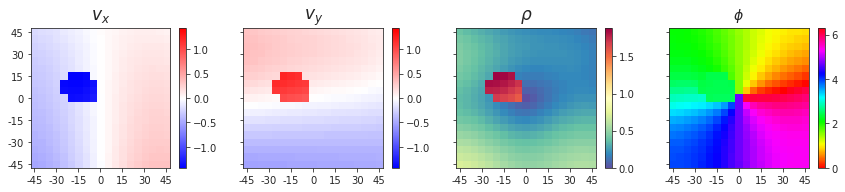

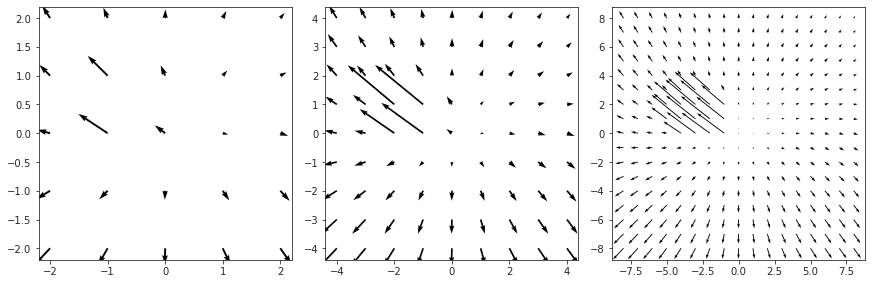

In [13]:
show_velocity(stim[ii])
show_opticflow(stim[ii])

In [14]:
rho, theta = vel2polar(stim)
rho.shape

(64200, 19, 19)

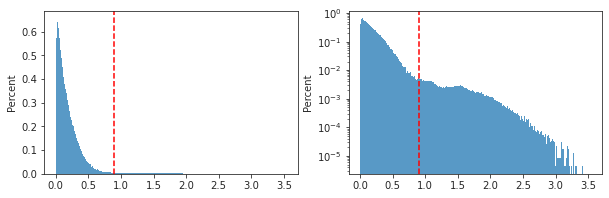

In [15]:
fig, axes = create_figure(1, 2, (10, 3))
sns.histplot(rho.ravel(), stat='percent', ax=axes[0])
sns.histplot(rho.ravel(), stat='percent', ax=axes[1])
for ax in axes.flat:
    ax.axvline(0.9, color='r', ls='--')
axes[1].set_yscale('log')
plt.show()

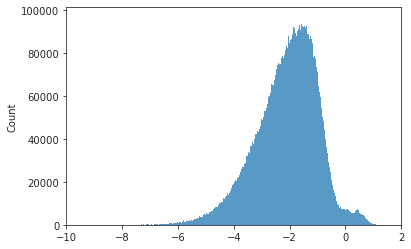

In [16]:
ax = sns.histplot(np.log(rho[rho.nonzero()]))
ax.set_xlim(-10, 2);

In [17]:
ii, xx, yy = np.unravel_index(np.argmax(rho), rho.shape)
ii, xx, yy

(14220, 4, 18)

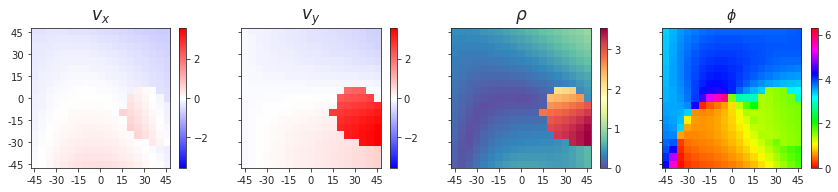

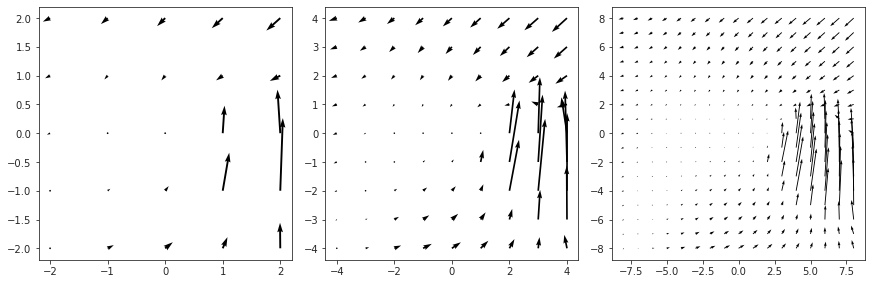

In [18]:
show_velocity(stim[ii])
show_opticflow(stim[ii])

In [19]:
norm = sp_lin.norm(stim, axis=3).mean(1).mean(1)
norm.shape

(64200,)

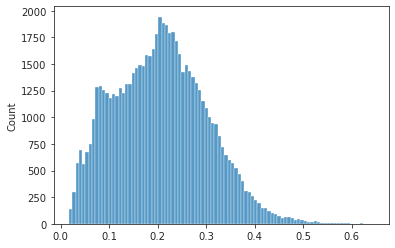

In [20]:
ax = sns.histplot(norm)

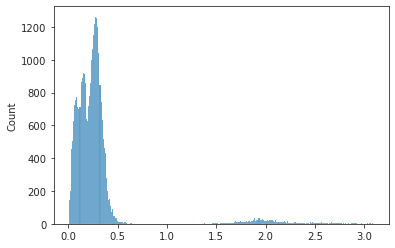

In [47]:
# use to be this: (when pos_obj[2] was close to 0.2)

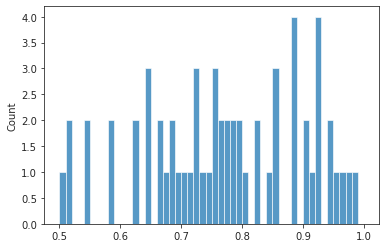

In [21]:
sns.histplot(self.pos_obj[2], bins=np.linspace(0.5, 1, 51));

In [22]:
argsort = np.argsort(norm)

In [23]:
ii = np.unravel_index(argsort[-1], norm.shape)
i, j, k = sim.idxs[np.where(sim.acc)[0][ii]]
ii, (i, j, k)

((29881,), (26, 56, 54))

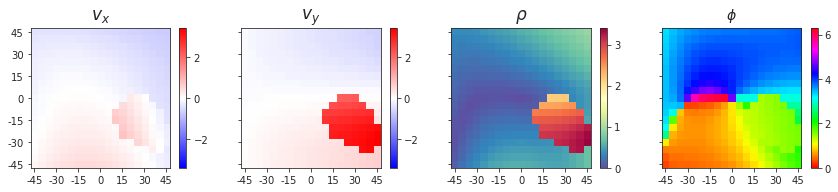

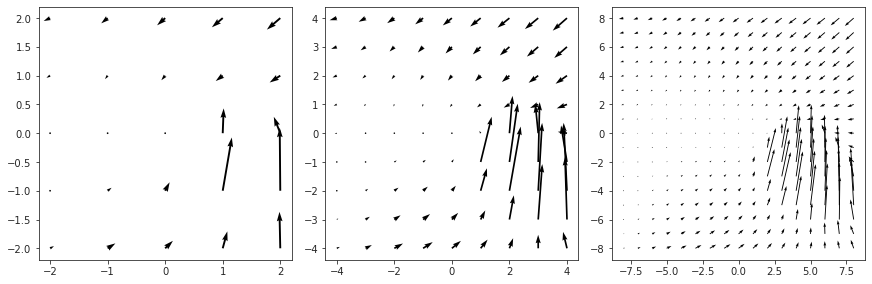

In [24]:
show_velocity(stim[ii])
show_opticflow(stim[ii])

In [25]:
norm[ii]

0.6441884583814518

In [26]:
ii = np.unravel_index(argsort[0], norm.shape)
i, j, k = sim.idxs[np.where(sim.acc)[0][ii]]
ii, (i, j, k)

((40446,), (37, 20, 14))

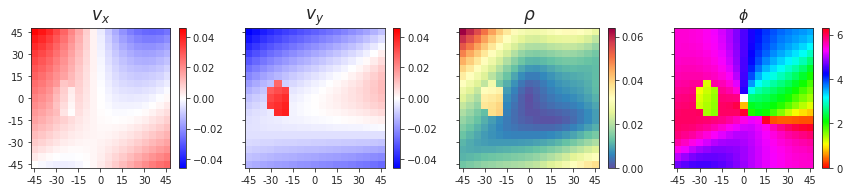

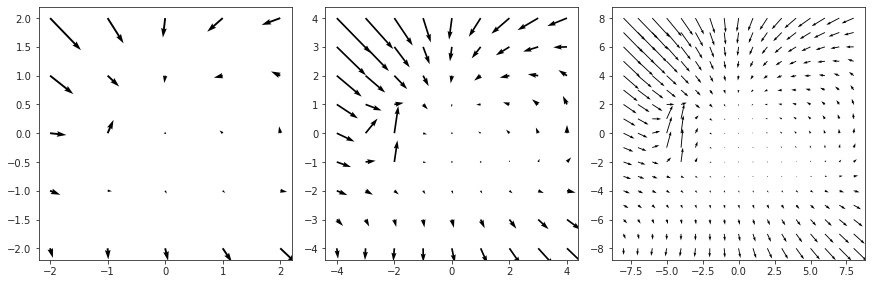

In [27]:
show_velocity(stim[ii])
show_opticflow(stim[ii])

In [28]:
norm[ii]

0.01715262288160816

In [29]:
n = 160
bins = np.linspace(-4, 4 + 8 / n, n + 2) - 4 / n

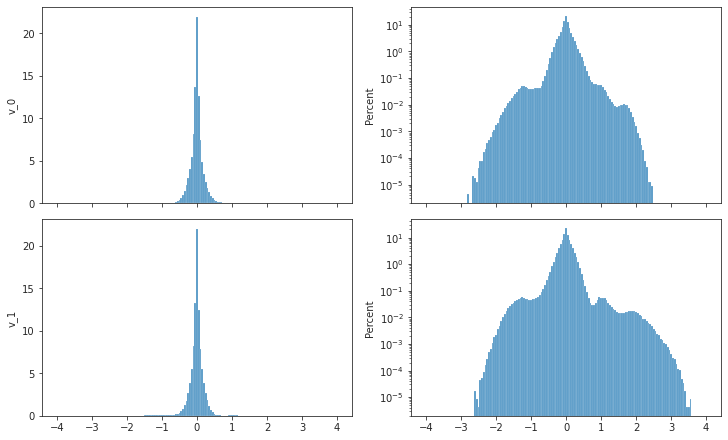

In [30]:
fig, axes = create_figure(2, 2, figsize=(10, 6), sharex='all', sharey='col', constrained_layout=True)
for i in range(2):
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 0])
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 1])
    axes[i, 0].set_ylabel(f"v_{i}")
    axes[i, 1].set_yscale('log')
plt.show()

In [31]:
n = 40
bins = np.linspace(-4, 4 + 8 / n, n + 2) - 4 / n
bins

array([-4.1, -3.9, -3.7, -3.5, -3.3, -3.1, -2.9, -2.7, -2.5, -2.3, -2.1,
       -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
        0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,
        2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1])

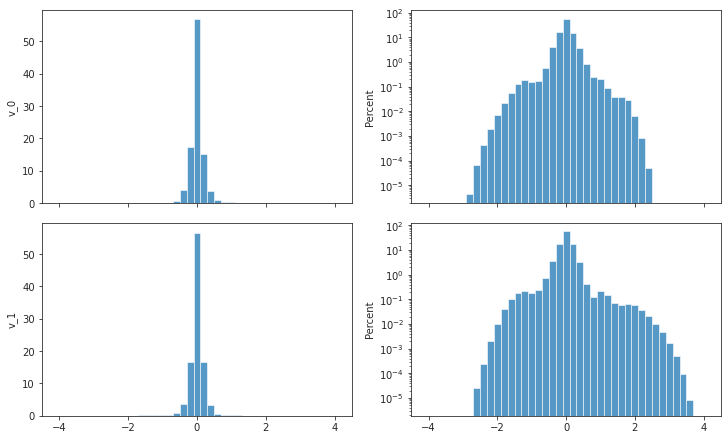

In [32]:
fig, axes = create_figure(2, 2, figsize=(10, 6), sharex='all', sharey='col', constrained_layout=True)
for i in range(2):
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 0])
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 1])
    axes[i, 0].set_ylabel(f"v_{i}")
    axes[i, 1].set_yscale('log')
plt.show()

In [33]:
n = 40
bins = np.linspace(-1, 1 + 2 / n, n + 2) - 1 / n
bins

array([-1.025, -0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675,
       -0.625, -0.575, -0.525, -0.475, -0.425, -0.375, -0.325, -0.275,
       -0.225, -0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,
        0.175,  0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,
        0.575,  0.625,  0.675,  0.725,  0.775,  0.825,  0.875,  0.925,
        0.975,  1.025])

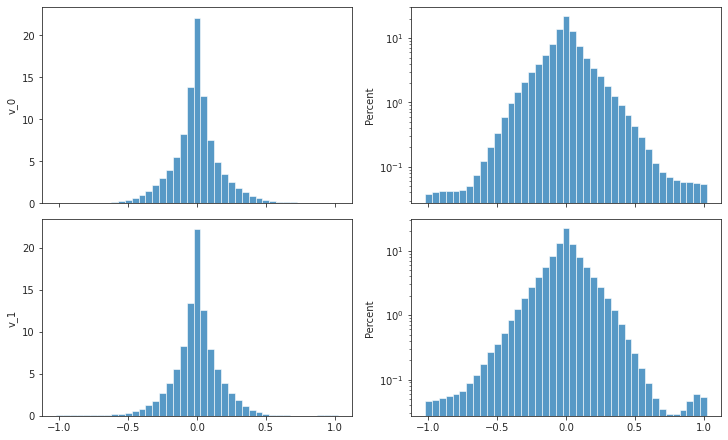

In [34]:
fig, axes = create_figure(2, 2, figsize=(10, 6), sharex='all', sharey='col', constrained_layout=True)
for i in range(2):
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 0])
    sns.histplot(stim[..., i].ravel(), bins=bins, stat='percent', ax=axes[i, 1])
    axes[i, 0].set_ylabel(f"v_{i}")
    axes[i, 1].set_yscale('log')
plt.show()

In [35]:
from fitter import Fitter

In [36]:
xxx = rho[:1000]

In [37]:
f = Fitter(xxx[xxx.nonzero()], distributions=['expon', 'gamma', 'powerlaw'], timeout=200)
f.fit()

,sumsquare_error,aic,bic,kl_div
expon,1.256466,1021.624525,-4.536911e+06,0.023733
gamma,21.278394,380.963473,-3.515537e+06,0.517916
powerlaw,32.034301,301.287149,-3.367853e+06,1.086200


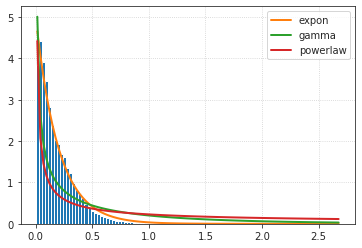

In [38]:
f.summary()

In [39]:
f = Fitter(rho[rho.nonzero()], distributions=['expon'], timeout=200)
f.fit()

,sumsquare_error,aic,bic,kl_div
expon,0.771296,1399.851848,-3.990006e+08,0.023714


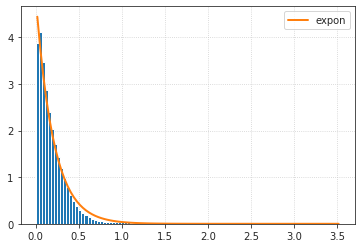

In [40]:
f.summary()

In [41]:
f = Fitter(rho[np.logical_and(rho >= 0.02, rho < 1)], distributions=['expon'], timeout=200)
f.fit()

,sumsquare_error,aic,bic,kl_div
expon,1.344394,219.517644,-3.502942e+08,0.003741


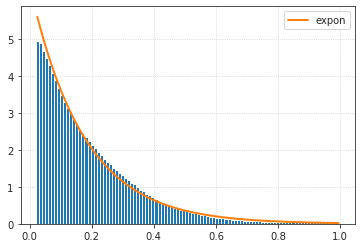

In [42]:
f.summary()

## Correlation structure of generative factors

In [43]:
g = np_nans((self.acc.sum(), 11))
for ii, idx in enumerate(np.where(self.acc)[0]):
    i, j, k = self.idxs[idx]
    g[ii, :2] = self.fix[i]
    g[ii, 2:5] = self.vel_slf[:, j]
    g[ii, 5:8] = self.vel_obj[:, j]
    g[ii, 8:11] = self.pos_obj[:, j]
g.shape

(64200, 11)

In [44]:
d = sp_dist.squareform(sp_dist.pdist(g.T, metric='correlation'))
corr = 1 - d
np.fill_diagonal(corr, 0.)
corr.shape

(11, 11)

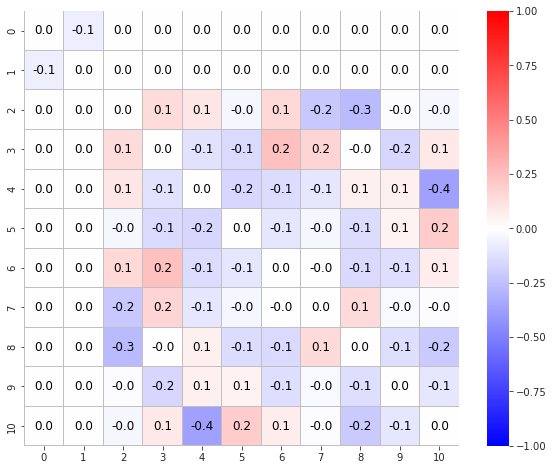

In [45]:
fig, ax = create_figure(figsize=(10, 8))
sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap='bwr',
    annot=True,
    fmt='0.1f',
    annot_kws={'fontsize': 12, 'color': 'k'},
    linecolor='silver',
    linewidths=0.01,
    ax=ax,
)
ax_square(ax)
plt.show()

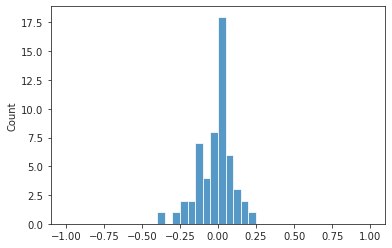

In [46]:
sns.histplot(sp_dist.squareform(corr), bins=np.linspace(-1, 1, 41));

In [47]:
z = np_nans((len(self.idxs), 11))
for idx, (i, j, k) in self.idxs.items():
    z[idx, :2] = self.fix[i]
    z[idx, 2:5] = self.vel_slf[:, j]
    z[idx, 5:8] = self.vel_obj[:, j]
    z[idx, 8:11] = self.pos_obj[:, j]
z.shape

(216000, 11)

In [48]:
d = sp_dist.squareform(sp_dist.pdist(z.T, metric='correlation'))
corr = 1 - d
np.fill_diagonal(corr, 0.)
corr.shape

(11, 11)

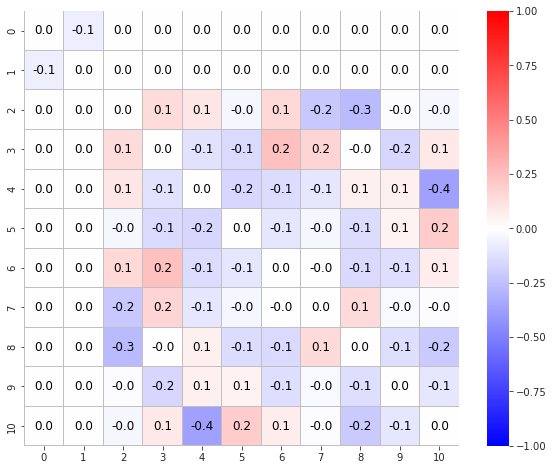

In [49]:
fig, ax = create_figure(figsize=(10, 8))
sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap='bwr',
    annot=True,
    fmt='0.1f',
    annot_kws={'fontsize': 12, 'color': 'k'},
    linecolor='silver',
    linewidths=0.01,
    ax=ax,
)
ax_square(ax)
plt.show()

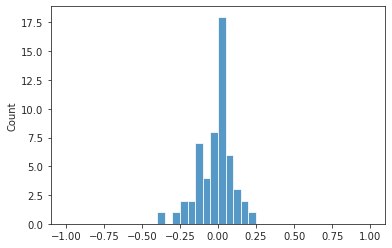

In [50]:
sns.histplot(sp_dist.squareform(corr), bins=np.linspace(-1, 1, 41));

## Older plots

In [34]:
i, j, k = np.unravel_index(np.argmin(norm), norm.shape)
i, j, k

(1, 0, 0)

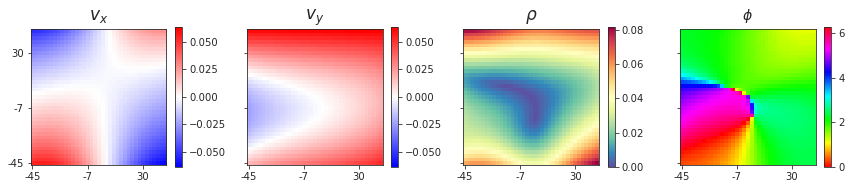

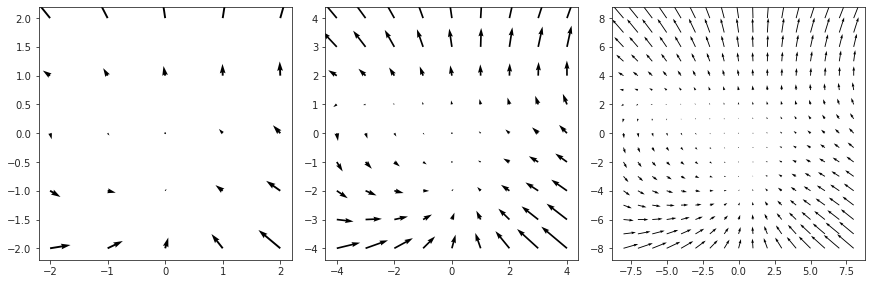

In [35]:
show_velocity(alpha_dot[i, ..., j, k])
show_opticflow(alpha_dot[i, ..., j, k])

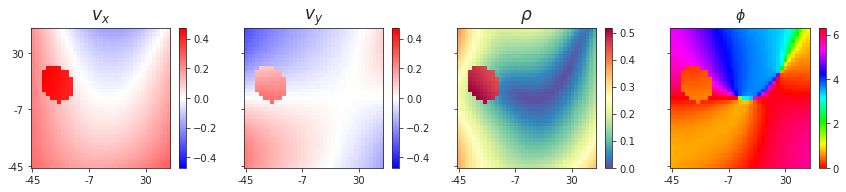

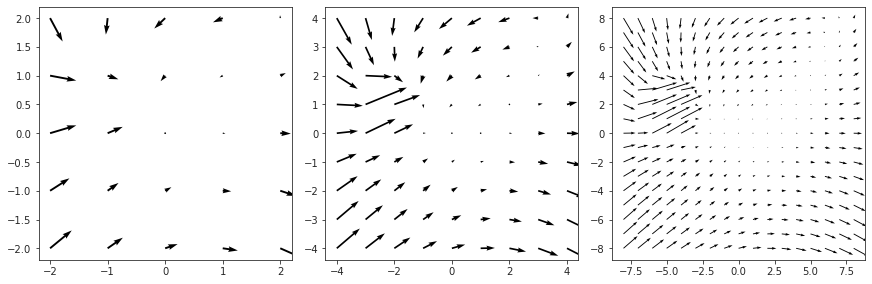

In [36]:
i, j, k = 0, 3, 11
show_velocity(alpha_dot[i, ..., j, k])
show_opticflow(alpha_dot[i, ..., j, k])

## Sample fixation points (OLD, ignore)

In [6]:
def sample_fix(num: int, rng: np.random.Generator = None):
    rng = rng if rng else get_rng()
    fix = np_nans((num, 2))

    bound = 1 / np.tan(np.deg2rad(fov))
    kws = dict(low=-bound, high=bound)

    idx = 0
    while True:
        x = rng.uniform(**kws)
        y = rng.uniform(**kws)
        if abs(x) + abs(y) < 1:
            fix[idx] = x, y
            idx += 1
        if idx == num:
            break
    return fix

In [7]:
num = 1000
fix = sample_fix(num, rng)

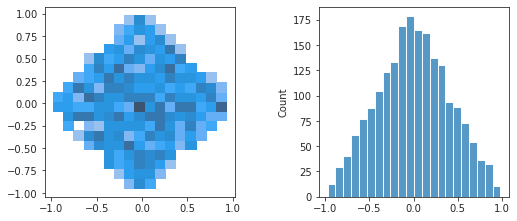

In [8]:
fig, axes = create_figure(1, 2, (9, 3.5))
sns.histplot(x=fix[:, 0], y=fix[:, 1], ax=axes[0])
sns.histplot(fix.ravel(), ax=axes[1])
ax_square(axes)
plt.show()

## Sample directions (unit vectors)

In [17]:
x = rng.uniform(-1, 1, 1000)
y = rng.uniform(-1, 1, 1000)
pos = np.stack([x, y], axis=1)

In [18]:
pos.shape

(1000, 2)

<AxesSubplot:>

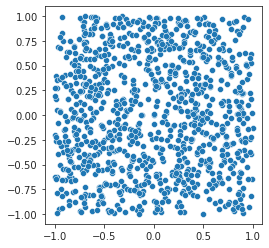

In [20]:
ax = sns.scatterplot(x=pos[:, 0], y=pos[:, 1])
ax_square(ax)

In [9]:
num = 1000
points = rng.normal(size=(num, 3))
points /= sp_lin.norm(points, axis=1, keepdims=True)
points.shape

(1000, 3)

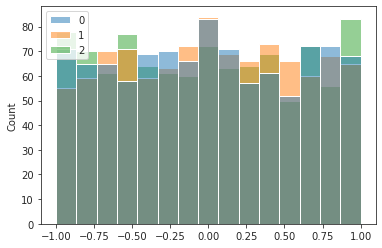

In [10]:
sns.histplot(points);

In [11]:
r = cart2polar(points)
collections.Counter(np.round(r[:, 0], 12))

Counter({1.0: 1000})

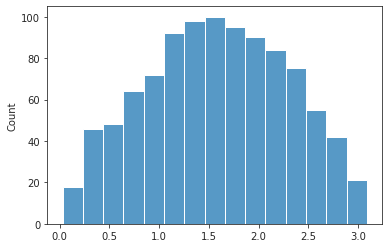

In [12]:
sns.histplot(r[:, 1]);

In [121]:
num = 1000
# bound = 1 / np.tan(np.deg2rad(fov))
a = 4
fix_x = 2 * rng.beta(a=a, b=a, size=num) - 1
fix_y = np.zeros_like(fix_x)
for i, x in enumerate(fix_x):
    bound = 1 - abs(x)
    fix_y[i] = rng.uniform(low=-bound, high=bound)
fix = np.concatenate([
    np.expand_dims(fix_x, axis=-1),
    np.expand_dims(fix_y, axis=-1),
], axis=-1)
fix.shape

(1000, 2)

<AxesSubplot:ylabel='Count'>

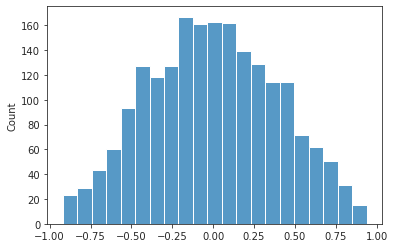

In [122]:
sns.histplot(fix.ravel())

<AxesSubplot:>

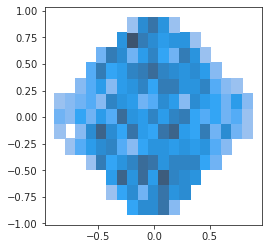

In [123]:
ax = sns.histplot(x=fix[:, 0], y=fix[:, 1])
ax_square(ax)

<AxesSubplot:>

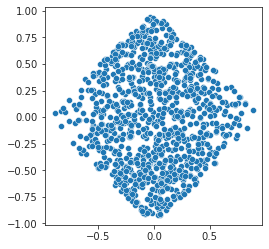

In [124]:
ax = sns.scatterplot(x=fix[:, 0], y=fix[:, 1])
ax_square(ax)

<AxesSubplot:ylabel='Count'>

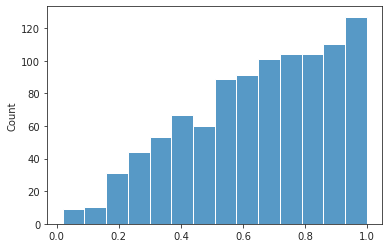

In [125]:
sns.histplot(np.abs(fix).sum(1))

In [126]:
def uniform_diamond(u, v):
    while True:
        s = random.random()
        t = random.random()
        in_triangle = s + t <= 1
        p = s * u + t * v if in_triangle else (1 - s) * u + (1 - t) * v
        yield p

In [136]:
next(uniform_diamond(2, 3))

2.2358407407437593

In [31]:
self.fix

array([[ 0.27392337, -0.46042657],
       [ 0.21327155,  0.45899312],
       [ 0.08724998,  0.87014485],
       [ 0.72635784,  0.08292244],
       [-0.40057622, -0.15462556],
       [ 0.34124883,  0.29437902],
       [ 0.23077022, -0.23264489],
       [ 0.37108397,  0.30091855],
       [ 0.37689346, -0.22215715],
       [ 0.05070864, -0.37951625]])

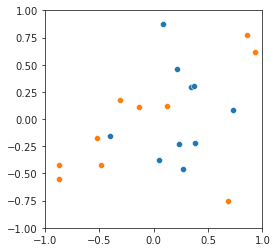

In [37]:
ax = sns.scatterplot(x=self.fix[:, 0], y=self.fix[:, 1])
sns.scatterplot(x=self.obj_pos[0], y=self.obj_pos[1], color='C1', ax=ax)
ax.set(xlim=(-1, 1), ylim=(-1, 1))
ax_square(ax);